<a href="https://colab.research.google.com/github/mongrelDS/Richters-Predicter/blob/main/Richter's_Predictor_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Driven Data Competition

This is an entry to the Richter's Predictor competition hosted by DrivenData.  ( [link here](https://www.drivendata.org/competitions/57/nepal-earthquake/)) 

Ill run through some models to find the one that might fit.


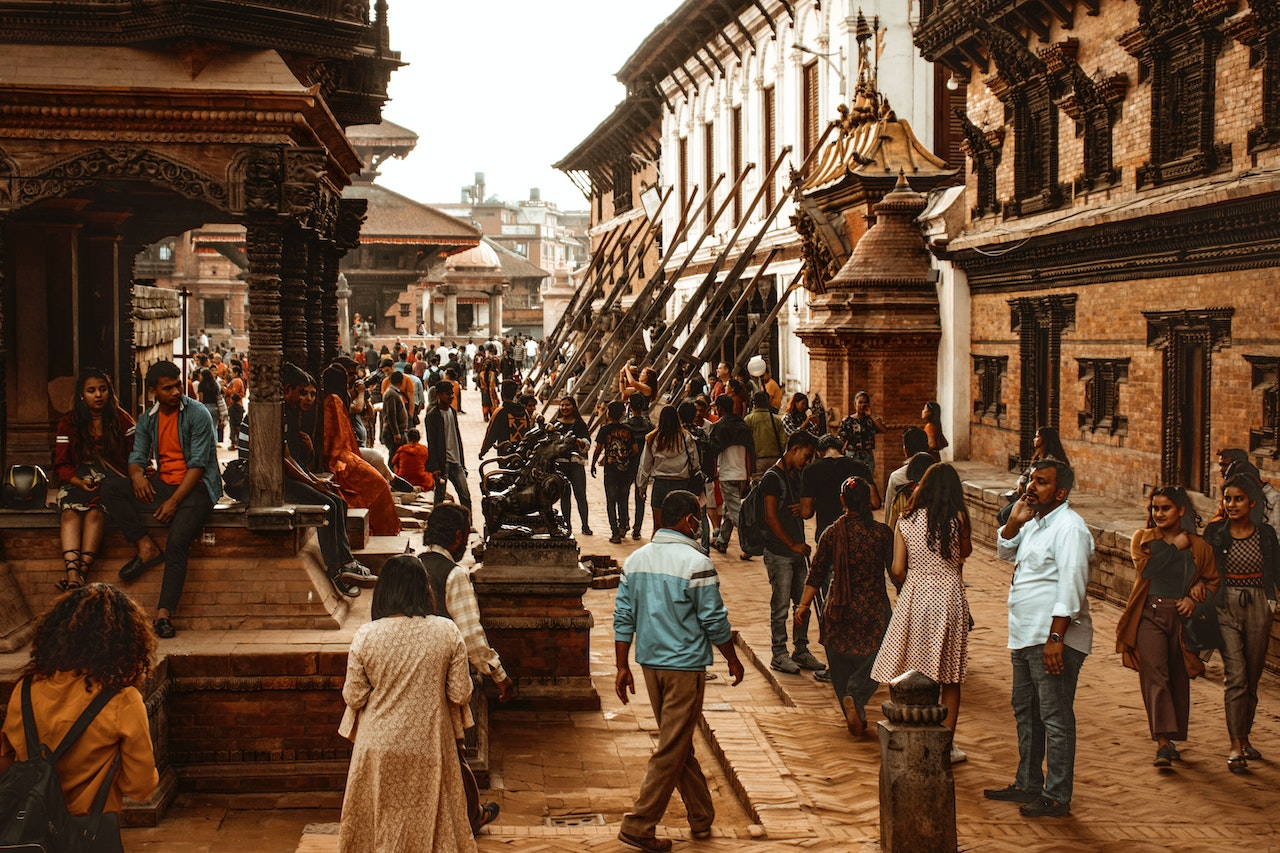


Photo by Bimal Ranabhat: [Pexels](https://www.pexels.com/photo/people-standing-near-building-2177708/)


In [1]:
#@title Data Import

import pandas as pd

#Submission Format	
filepath = "/content/drive/MyDrive/Public Data Projects/Nepal/Richters_Predictor/submission_format.csv"
submission_format = pd.read_csv(filepath, index_col='building_id')

# Test Values	
filepath = "/content/drive/MyDrive/Public Data Projects/Nepal/Richters_Predictor/test_values.csv"
df_test_values = pd.read_csv(filepath, index_col='building_id')

#Train Labels	
filepath = "/content/drive/MyDrive/Public Data Projects/Nepal/Richters_Predictor/train_labels.csv"
df_train_labels= pd.read_csv(filepath, index_col='building_id')

#Train Values
filepath = "/content/drive/MyDrive/Public Data Projects/Nepal/Richters_Predictor/train_values.csv"
df_train= pd.read_csv(filepath, index_col='building_id')

## EDA (Exploratory Data Analysis)

I'll run through a few visualuizations to spot useful features in the data.


In [2]:
import pandas_profiling as pf

In [ ]:
pf.ProfileReport(df_train)

In [4]:
#@title damage_grade
print (df_train_labels["damage_grade"].value_counts())

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


In [5]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = df_train[selected_features]

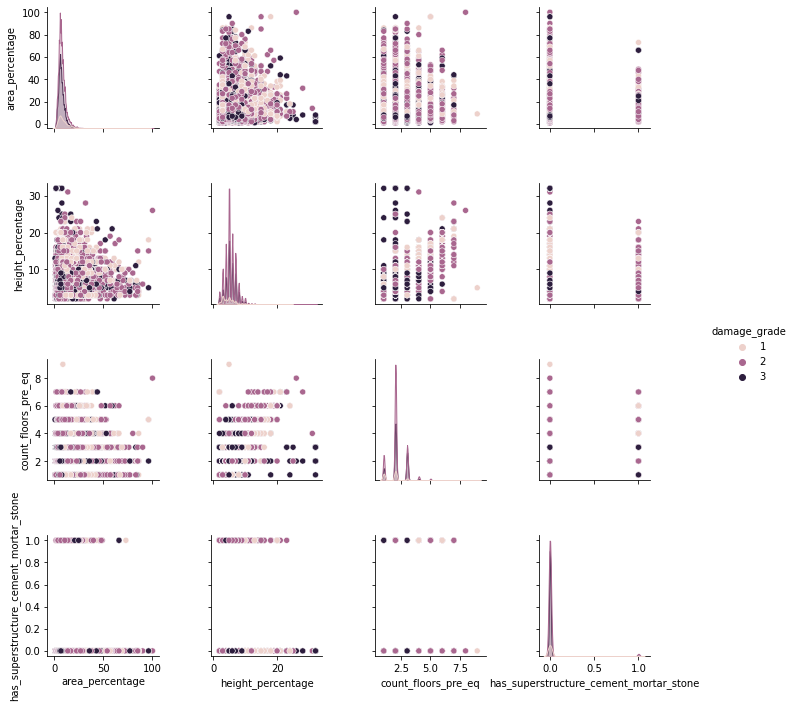

In [6]:
import seaborn as sns
sns.pairplot(train_values_subset.join(df_train_labels), 
             hue='damage_grade')

In [7]:
# init setup
import numpy as np
from pycaret.classification import *

In [8]:
df_train = pd.merge(df_train, df_train_labels, how="left", on="building_id")

In [9]:
mySetup= setup(
    data = df_train,
    target= "damage_grade",
    session_id= 42, normalize=True, fold=5)

,Description,Value
0,session_id,42
1,Target,damage_grade
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(260601, 39)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='damage_grade',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all'

In [10]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
dt=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6494,0.6812,0.5989,0.6505,0.6499,0.3703,0.3703
1,0.6520,0.6828,0.6031,0.6528,0.6523,0.3745,0.3745
2,0.6483,0.6800,0.5999,0.6495,0.6489,0.3689,0.3689
3,0.6523,0.6856,0.6061,0.6541,0.6531,0.3774,0.3775
4,0.6477,0.6805,0.5998,0.6492,0.6484,0.3684,0.3685
Mean,0.6499,0.6820,0.6016,0.6512,0.6505,0.3719,0.3720
Std,0.0019,0.0020,0.0027,0.0019,0.0019,0.0035,0.0035


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [12]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5936,0.6645,0.4562,0.5823,0.5461,0.1630,0.1904
1,0.5965,0.6656,0.4624,0.5858,0.5491,0.1682,0.1966
2,0.5954,0.6615,0.4591,0.5845,0.5489,0.1661,0.1933
3,0.5947,0.6601,0.4635,0.5828,0.5497,0.1690,0.1950
4,0.5944,0.6635,0.4561,0.5826,0.5480,0.1649,0.1915
Mean,0.5949,0.6630,0.4595,0.5836,0.5484,0.1662,0.1933
Std,0.0010,0.0020,0.0031,0.0014,0.0012,0.0022,0.0022


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
knn=create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6480,0.7302,0.5797,0.6438,0.6444,0.3503,0.3517
1,0.6487,0.7308,0.5817,0.6441,0.6449,0.3505,0.3519
2,0.6508,0.7306,0.5782,0.6457,0.6465,0.3525,0.3541
3,0.6460,0.7286,0.5805,0.6416,0.6425,0.3465,0.3478
4,0.6461,0.7281,0.5789,0.6418,0.6428,0.3475,0.3485
Mean,0.6479,0.7297,0.5798,0.6434,0.6442,0.3495,0.3508
Std,0.0018,0.0011,0.0012,0.0015,0.0015,0.0022,0.0023


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [14]:
compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7098,0.8040,0.6075,0.7107,0.6995,0.4404,0.4518,6.724
rf,Random Forest Classifier,0.7054,0.7969,0.6172,0.7028,0.6983,0.4416,0.4475,41.064
et,Extra Trees Classifier,0.6821,0.7676,0.6044,0.6776,0.6769,0.4055,0.4084,51.146
gbc,Gradient Boosting Classifier,0.6797,0.7703,0.5629,0.6845,0.6616,0.3679,0.3887,121.560
dt,Decision Tree Classifier,0.6499,0.6820,0.6016,0.6512,0.6505,0.3719,0.3720,2.208
knn,K Neighbors Classifier,0.6479,0.7297,0.5798,0.6434,0.6442,0.3495,0.3508,427.192
ada,Ada Boost Classifier,0.6443,0.6683,0.5148,0.6609,0.6092,0.2771,0.3148,9.942
lda,Linear Discriminant Analysis,0.5902,0.6562,0.5104,0.5808,0.5497,0.1892,0.2111,4.446
lr,Logistic Regression,0.5949,0.6630,0.4595,0.5836,0.5484,0.1662,0.1933,59.950
ridge,Ridge Classifier,0.5927,0.0000,0.4319,0.5849,0.5317,0.1393,0.1746,0.352


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
bestModel= automl(optimize='F1')

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=F1, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking except

In [16]:
print(bestModel)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [17]:
tuned_bestModel=tune_model(bestModel,
                           optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7253,0.8204,0.6510,0.7232,0.7206,0.4853,0.4895
1,0.7283,0.8240,0.6523,0.7266,0.7232,0.4892,0.4938
2,0.7307,0.8231,0.6570,0.7288,0.7262,0.4955,0.4994
3,0.7326,0.8276,0.6594,0.7307,0.7280,0.4989,0.5030
4,0.7267,0.8235,0.6548,0.7245,0.7223,0.4889,0.4926
Mean,0.7287,0.8237,0.6549,0.7268,0.7241,0.4916,0.4957
Std,0.0026,0.0023,0.0031,0.0027,0.0027,0.0049,0.0049


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.7, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


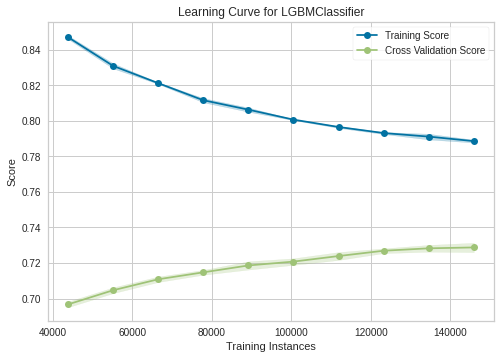

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(tuned_bestModel, plot='learning')

In [19]:
plot_model(tuned_bestModel, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.5
max_depth,-1
min_child_samples,11
min_child_weight,0.001
min_split_gain,0.3
n_estimators,250


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


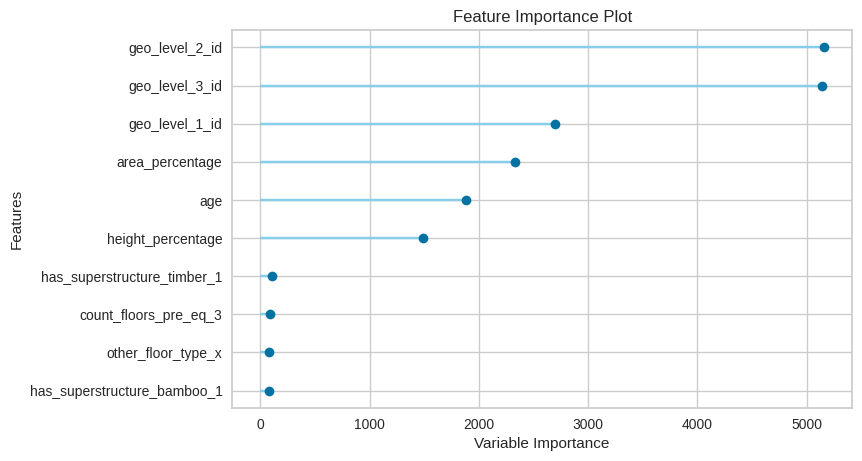

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(tuned_bestModel, plot='feature')

In [21]:
gbc = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7074,0.8021,0.6047,0.7075,0.6974,0.4369,0.4475
1,0.7138,0.8056,0.6110,0.7159,0.7032,0.4469,0.4593
2,0.7080,0.8021,0.6074,0.7085,0.6980,0.4376,0.4483
3,0.7114,0.8048,0.6097,0.7129,0.7010,0.4430,0.4548
4,0.7084,0.8056,0.6048,0.7088,0.6980,0.4379,0.4490
Mean,0.7098,0.8040,0.6075,0.7107,0.6995,0.4404,0.4518
Std,0.0025,0.0016,0.0026,0.0032,0.0023,0.0039,0.0046


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.7, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


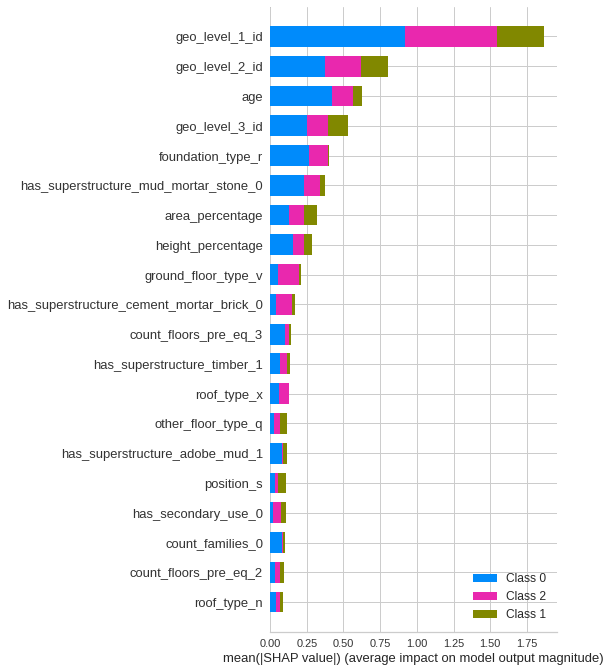

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [26]:
interpret_model(tuned_bestModel)

In [25]:
interpret_model(tuned_bestModel, plot='reason', observation=5)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.7, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=5, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: LGBMClassifier


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [27]:
final_model=finalize_model(tuned_bestModel)
print(final_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.7, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samp

LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.7, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
